In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
!pip install --upgrade numpy

In [5]:
clientes = pd.read_csv('creditos.csv')

In [8]:
clientes.shape

(200, 3)

In [9]:
clientes

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


Paso 1: Separar datos en clientes que han pagado y quienes no, hacer uso de los filtros

# Pagadores VS Deudores

In [11]:
buenos = clientes[clientes['cumplio']==1]
malos = clientes[clientes['cumplio']==0]
buenos, malos

(     edad  credito  cumplio
 1      19   477965        1
 6      23   583565        1
 7      24   100000        1
 8      24   199272        1
 13     25   195341        1
 ..    ...      ...      ...
 187    51   354045        1
 188    51   379188        1
 189    51   396544        1
 190    52   100000        1
 192    53   130475        1
 
 [167 rows x 3 columns],
      edad  credito  cumplio
 0      18   363112        0
 2      20   239072        0
 3      22   195265        0
 4      22   482174        0
 5      23   468815        0
 9      24   246195        0
 10     24   433444        0
 11     25   100000        0
 12     25   161474        0
 40     28   432323        0
 53     29   590394        0
 54     29   595997        0
 56     30   157157        0
 64     31   173752        0
 78     32   588455        0
 93     35   521187        0
 97     36   568053        0
 98     37   299154        0
 113    40   100000        0
 118    40   459974        0
 135    43   498

# Gráfica: Pagadores VS Deudores

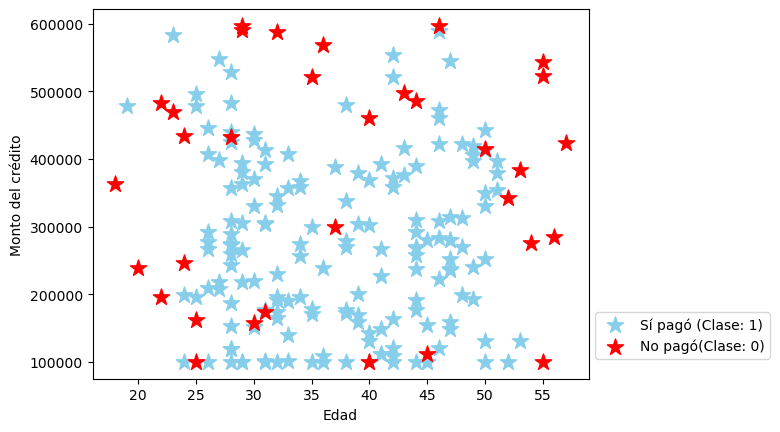

In [12]:
plt.scatter(buenos['edad'], buenos['credito'],
            marker="*", s=150, color='skyblue',
            label="Sí pagó (Clase: 1)")
plt.scatter(malos['edad'], malos['credito'],
           marker="*", s=150, color="red",
           label='No pagó(Clase: 0)')

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()


Aplicar modelo de K vecinos más cercanos, qué pasa si ponemos un nuevo dato?,¿según el modelo, a qué categoría pertenecería?

Data preparation: escalar los datos: MinMaxScaler los numeros más pequeños los hace 0 y los más grandes los hace 1.

In [15]:
datos = clientes[['edad','credito']]
clase = clientes['cumplio']

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos)
datos

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

# Creación del Modelo KNN

### Valor de K

In [16]:
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(datos,clase)

KNeighborsClassifier(n_neighbors=3)

Clase [0]
Probabilidades por clase [[0.66666667 0.33333333]]


/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<function matplotlib.pyplot.show(close=None, block=None)>

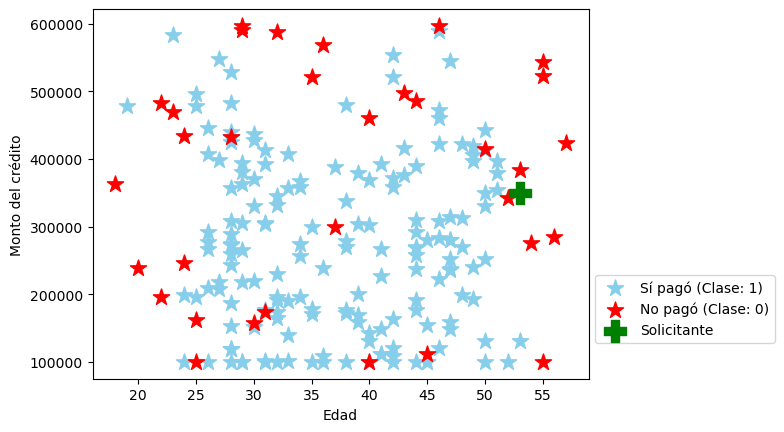

In [28]:
edad = 53
monto = 350000

#escalar datos del nuevo solicitante
#Lista dentro de una lista
solicitante = escalador.transform([[edad, monto]])
print("Clase", clasificador.predict(solicitante))
print("Probabilidades por clase", clasificador.predict_proba(solicitante))


#Calcular clase y probabilidades

#Código para graficar
plt.scatter(buenos["edad"], buenos["credito"],
           marker="*", s=150, color="skyblue", label="Sí pagó (Clase: 1)")
plt.scatter(malos['edad'], malos["credito"],
           marker="*", s=150, color="red", label= "No pagó (Clase: 0)")
plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show

# Regiones de las clases
## pagadores vs Deudores

/Users/alejandrareyes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


TypeError: __init__() got an unexpected keyword argument 'bbox_anchor'

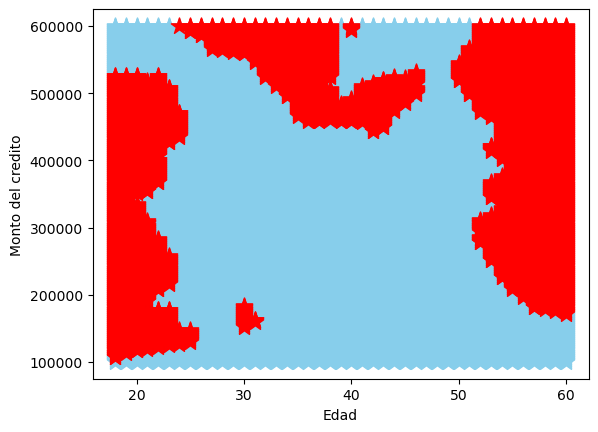

In [31]:
#Datos sintéticos de todos los posibles solicitantes
creditos = np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
edades = np.array([np.arange(18, 61)]*501).reshape(1, -1)
todos = pd.DataFrame(np.stack((edades, creditos), axis=2)[0],
                    columns=['edad','credito'])

#Escalar los datos
solicitantes = escalador.transform(todos)

#Predecir todas las clases
clases_resultantes = clasificador.predict(solicitantes)

#Codigo para graficar
buenos = todos[clases_resultantes==1]
malos = todos[clases_resultantes==0]
plt.scatter(buenos['edad'], buenos['credito'],
           marker="*", s=150, color='skyblue', label="Si pagará (Clase: 1)")
plt.scatter(malos['edad'], malos['credito'],
           marker="*", s=150, color='red', label="No pagará (Clase: 0)")
plt.ylabel("Monto del credito")
plt.xlabel("Edad")
plt.legend(bbox_anchor=(1, 0.2))
plt.show